In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

#### Read the data

In [3]:
df = pd.read_csv("../data/employee_attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Dummy
df['Attrition'] = df['Attrition'].replace({'Yes':1, 'No':0})

df_new = pd.get_dummies(df, drop_first=True)
df_new.head()

df_new = df_new.replace({True:1, False:0})
df_new.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,1,2,3,61,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,1,4,4,92,2,...,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,1,0,0,0,0,0,0,1,0,0


In [7]:
# Null values
# print("\n".join(df_new.columns.sort_values()))

In [8]:
X = df_new.drop('Attrition', axis=1)
y = df_new['Attrition']

In [9]:
# Standarize the dara
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# df_scaled = pd.DataFrame(df_scaled, columns=df.columns)


In [10]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [11]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)


In [12]:
# Train Models and report the accuracy
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
print("Accuracy of Logistic Regression Model: ", log_model.score(X_test, y_test))

svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
print("Accuracy of SVC Model: ", svc_model.score(X_test, y_test))

Accuracy of Logistic Regression Model:  0.8775510204081632
Accuracy of SVC Model:  0.8571428571428571


In [13]:
# Dimensionality Reduction
from sklearn.decomposition import PCA


components = len(df_new.columns)-1
compos = []
lr_scores = []
svm_scores = []

for i in range(components-1):

    compos.append(components-i)

    pca = PCA(n_components=components-i)
    pca.fit(X)
    x_pca = pca.transform(X)

    # Train the model on the reduced data
    X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=101)
    log_model = LogisticRegression()
    log_model.fit(X_train, y_train)
    log_pred = log_model.predict(X_test)
    print(f"Accuracy of Logistic Regression Model for n_components = {components-i}: ", log_model.score(X_test, y_test))

    svc_model = SVC()
    svc_model.fit(X_train, y_train)
    svc_pred = svc_model.predict(X_test)
    print(f"Accuracy of SVC Model for n_components = {components-i} : ", svc_model.score(X_test, y_test))
    print("\n")

    lr_scores.append(log_model.score(X_test, y_test))
    svm_scores.append(svc_model.score(X_test, y_test))
    


Accuracy of Logistic Regression Model for n_components = 47:  0.6757369614512472
Accuracy of SVC Model for n_components = 47 :  0.8412698412698413


Accuracy of Logistic Regression Model for n_components = 46:  0.6757369614512472
Accuracy of SVC Model for n_components = 46 :  0.8412698412698413


Accuracy of Logistic Regression Model for n_components = 45:  0.6757369614512472
Accuracy of SVC Model for n_components = 45 :  0.8412698412698413


Accuracy of Logistic Regression Model for n_components = 44:  0.6689342403628118
Accuracy of SVC Model for n_components = 44 :  0.8412698412698413


Accuracy of Logistic Regression Model for n_components = 43:  0.6689342403628118
Accuracy of SVC Model for n_components = 43 :  0.8412698412698413


Accuracy of Logistic Regression Model for n_components = 42:  0.673469387755102
Accuracy of SVC Model for n_components = 42 :  0.8412698412698413


Accuracy of Logistic Regression Model for n_components = 41:  0.673469387755102
Accuracy of SVC Model for n

#### TODO: Find optimal n

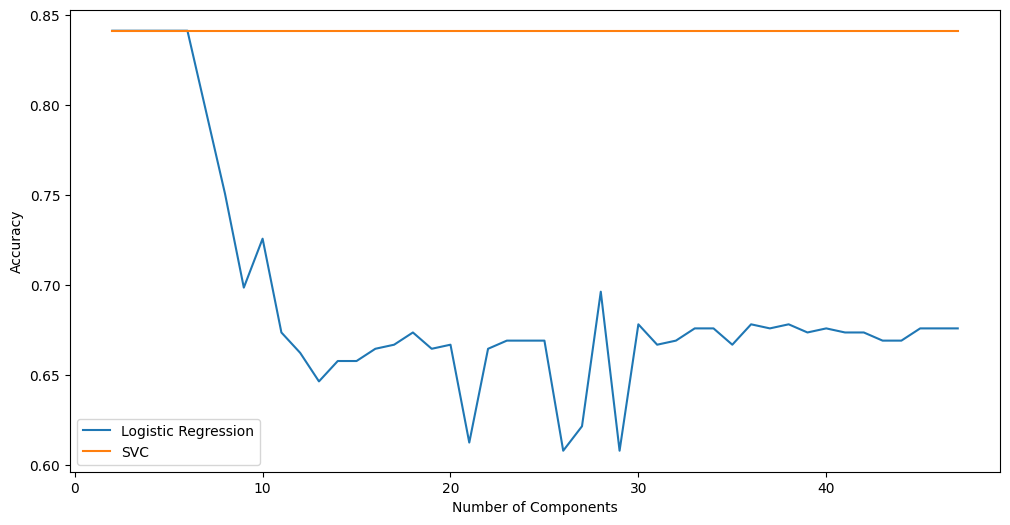

In [14]:
# Plot the accuracy
plt.figure(figsize=(12,6))
plt.plot(compos, lr_scores, label='Logistic Regression')
plt.plot(compos, svm_scores, label='SVC')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.legend()
plt.show()